E_0 =  138.02881165268067 eV
E_1 =  690.1440640909451 eV
E_2 =  1242.2593232862532 eV


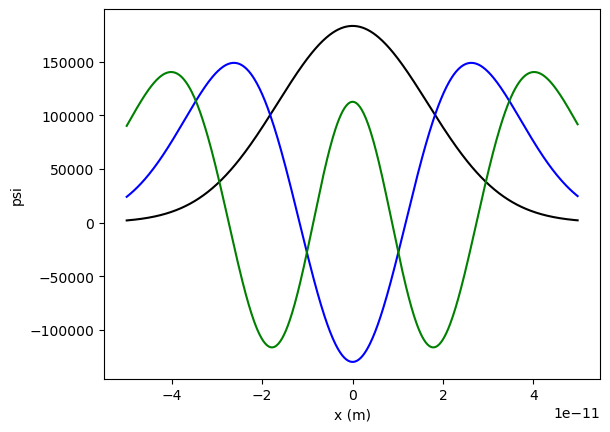

In [1]:
from numpy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel

# Constants
e = 1.602 * 10 ** -19
V0 = 50 * e  # J
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10
x_f = 10 ** -10
psi_0 = 0.0
hbar = 1.05457 * 10 ** -34  # J*s
m = 9.10938 * 10 ** -31 # electron mass in kg
N = 1000  # number of steps to use in Runge-Kutta
h = (x_f - x_0) / N


def psi(E):
    """
    Use 4-th order Runge-Kutta to determine psi(x_f)
    :param E:
    :return:
    """
    def f(r, x):

        def V(x):
            # return V0 * x ** 4 / a ** 4
            return V0 * x ** 2 / a ** 2
            # return 0.0

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)

    r = array([psi_0, 1.0] ,float)
    wavefunction = []
    for x in arange(x_0, x_f, h):
        wavefunction.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return array(wavefunction, float)


def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    # print(type(wavefunction))
    # print(wavefunction.shape)
    psi2 = wavefunction[N - 1]
    # print(psi2, type(psi2))
    # i = 0
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
        # i += 1

    # print(i)

    # Normalize the wavefunction using Simpson's rule
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
            4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)


# First three lowest energies of harmonic oscillator
# print('E_0 = ', secant_root(0, 0.5*e), 'eV')
# print('E_1 = ', secant_root(200*e, 400*e), 'eV')
# print('E_2 = ', secant_root(500*e, 700*e), 'eV')


# First three lowest energies of anharmonic oscillator
E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')

xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'k')
plot(xpoints[x_range], psi1[x_range], 'b')
plot(xpoints[x_range], psi2[x_range], 'g')
xlabel('x (m)')
ylabel('psi')
show()